In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdisease2/heart-2.csv


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

# Information About Data

In [3]:
dataset = pandas.read_csv('/kaggle/input/heartdisease2/heart-2.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,high,normal,150,no,2.3,0,0,fixed deffect,1
1,37,Male,non anginal pain,130,250,normal,S-T abnormanilty,187,no,3.5,0,0,reversible deffect,1
2,41,Female,atypical angina,130,204,normal,normal,172,no,1.4,2,0,reversible deffect,1
3,56,Male,atypical angina,120,236,normal,S-T abnormanilty,178,no,0.8,2,0,reversible deffect,1
4,57,Female,typical angina,120,354,normal,S-T abnormanilty,163,yes,0.6,2,0,reversible deffect,1


In [4]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,Female,typical angina,140,241,normal,S-T abnormanilty,123,yes,0.2,1,0,deffect-3,0
299,45,Male,asymptomatic,110,264,normal,S-T abnormanilty,132,no,1.2,1,0,deffect-3,0
300,68,Male,typical angina,144,193,high,S-T abnormanilty,141,no,3.4,1,2,deffect-3,0
301,57,Male,typical angina,130,131,normal,S-T abnormanilty,115,yes,1.2,1,1,deffect-3,0
302,57,Female,atypical angina,130,236,normal,normal,174,no,0.0,1,1,reversible deffect,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 33.3+ KB


In [6]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,1.000000


In [7]:
dataset.isnull().sum().sum()

0

# Correlation

In [8]:
visualization_dataset = pandas.read_csv('/kaggle/input/heartdisease2/heart-2.csv')

In [9]:
import csv 
  
with open('/kaggle/input/heartdisease2/heart-2.csv') as csv_file: 
  
    csv_reader = csv.reader(csv_file, delimiter = ',') 
    list_of_column_names = [] 

    for row in csv_reader: 
        list_of_column_names.append(row) 
        break
  

print("List of column names : ", list_of_column_names[0])

List of column names :  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [10]:
fbs_mapping = {'normal':0, 'high':1}
visualization_dataset['fbs'] = visualization_dataset['fbs'].map(fbs_mapping)

sex_mapping = {'Male':0, 'Female':1}
visualization_dataset['sex'] = visualization_dataset['sex'].map(sex_mapping)

exang_mapping = {'no':0, 'yes':1}
visualization_dataset['exang'] = visualization_dataset['exang'].map(exang_mapping)

cp_mapping = {'asymptomatic':0, 'non anginal pain':1, 'atypical angina':2,'typical angina':3}
visualization_dataset['cp'] = visualization_dataset['cp'].map(cp_mapping)

restecg_mapping = {'normal':0, 'S-T abnormanilty':1, '2':2}
visualization_dataset['restecg'] = visualization_dataset['restecg'].map(restecg_mapping)

thal_mapping = {'fixed deffect':0, 'reversible deffect':1, 'deffect-3':2, 'normal':3}
visualization_dataset['thal'] = visualization_dataset['thal'].map(thal_mapping)

In [11]:
visualization_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,0,0,145,233,1,0,150,0,2.3,0,0,0,1
1,37,0,1,130,250,0,1,187,0,3.5,0,0,1,1
2,41,1,2,130,204,0,0,172,0,1.4,2,0,1,1
3,56,0,2,120,236,0,1,178,0,0.8,2,0,1,1
4,57,1,3,120,354,0,1,163,1,0.6,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,3,140,241,0,1,123,1,0.2,1,0,2,0
299,45,0,0,110,264,0,1,132,0,1.2,1,0,2,0
300,68,0,3,144,193,1,1,141,0,3.4,1,2,2,0
301,57,0,3,130,131,0,1,115,1,1.2,1,1,2,0


In [12]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
sns.set_style('darkgrid')

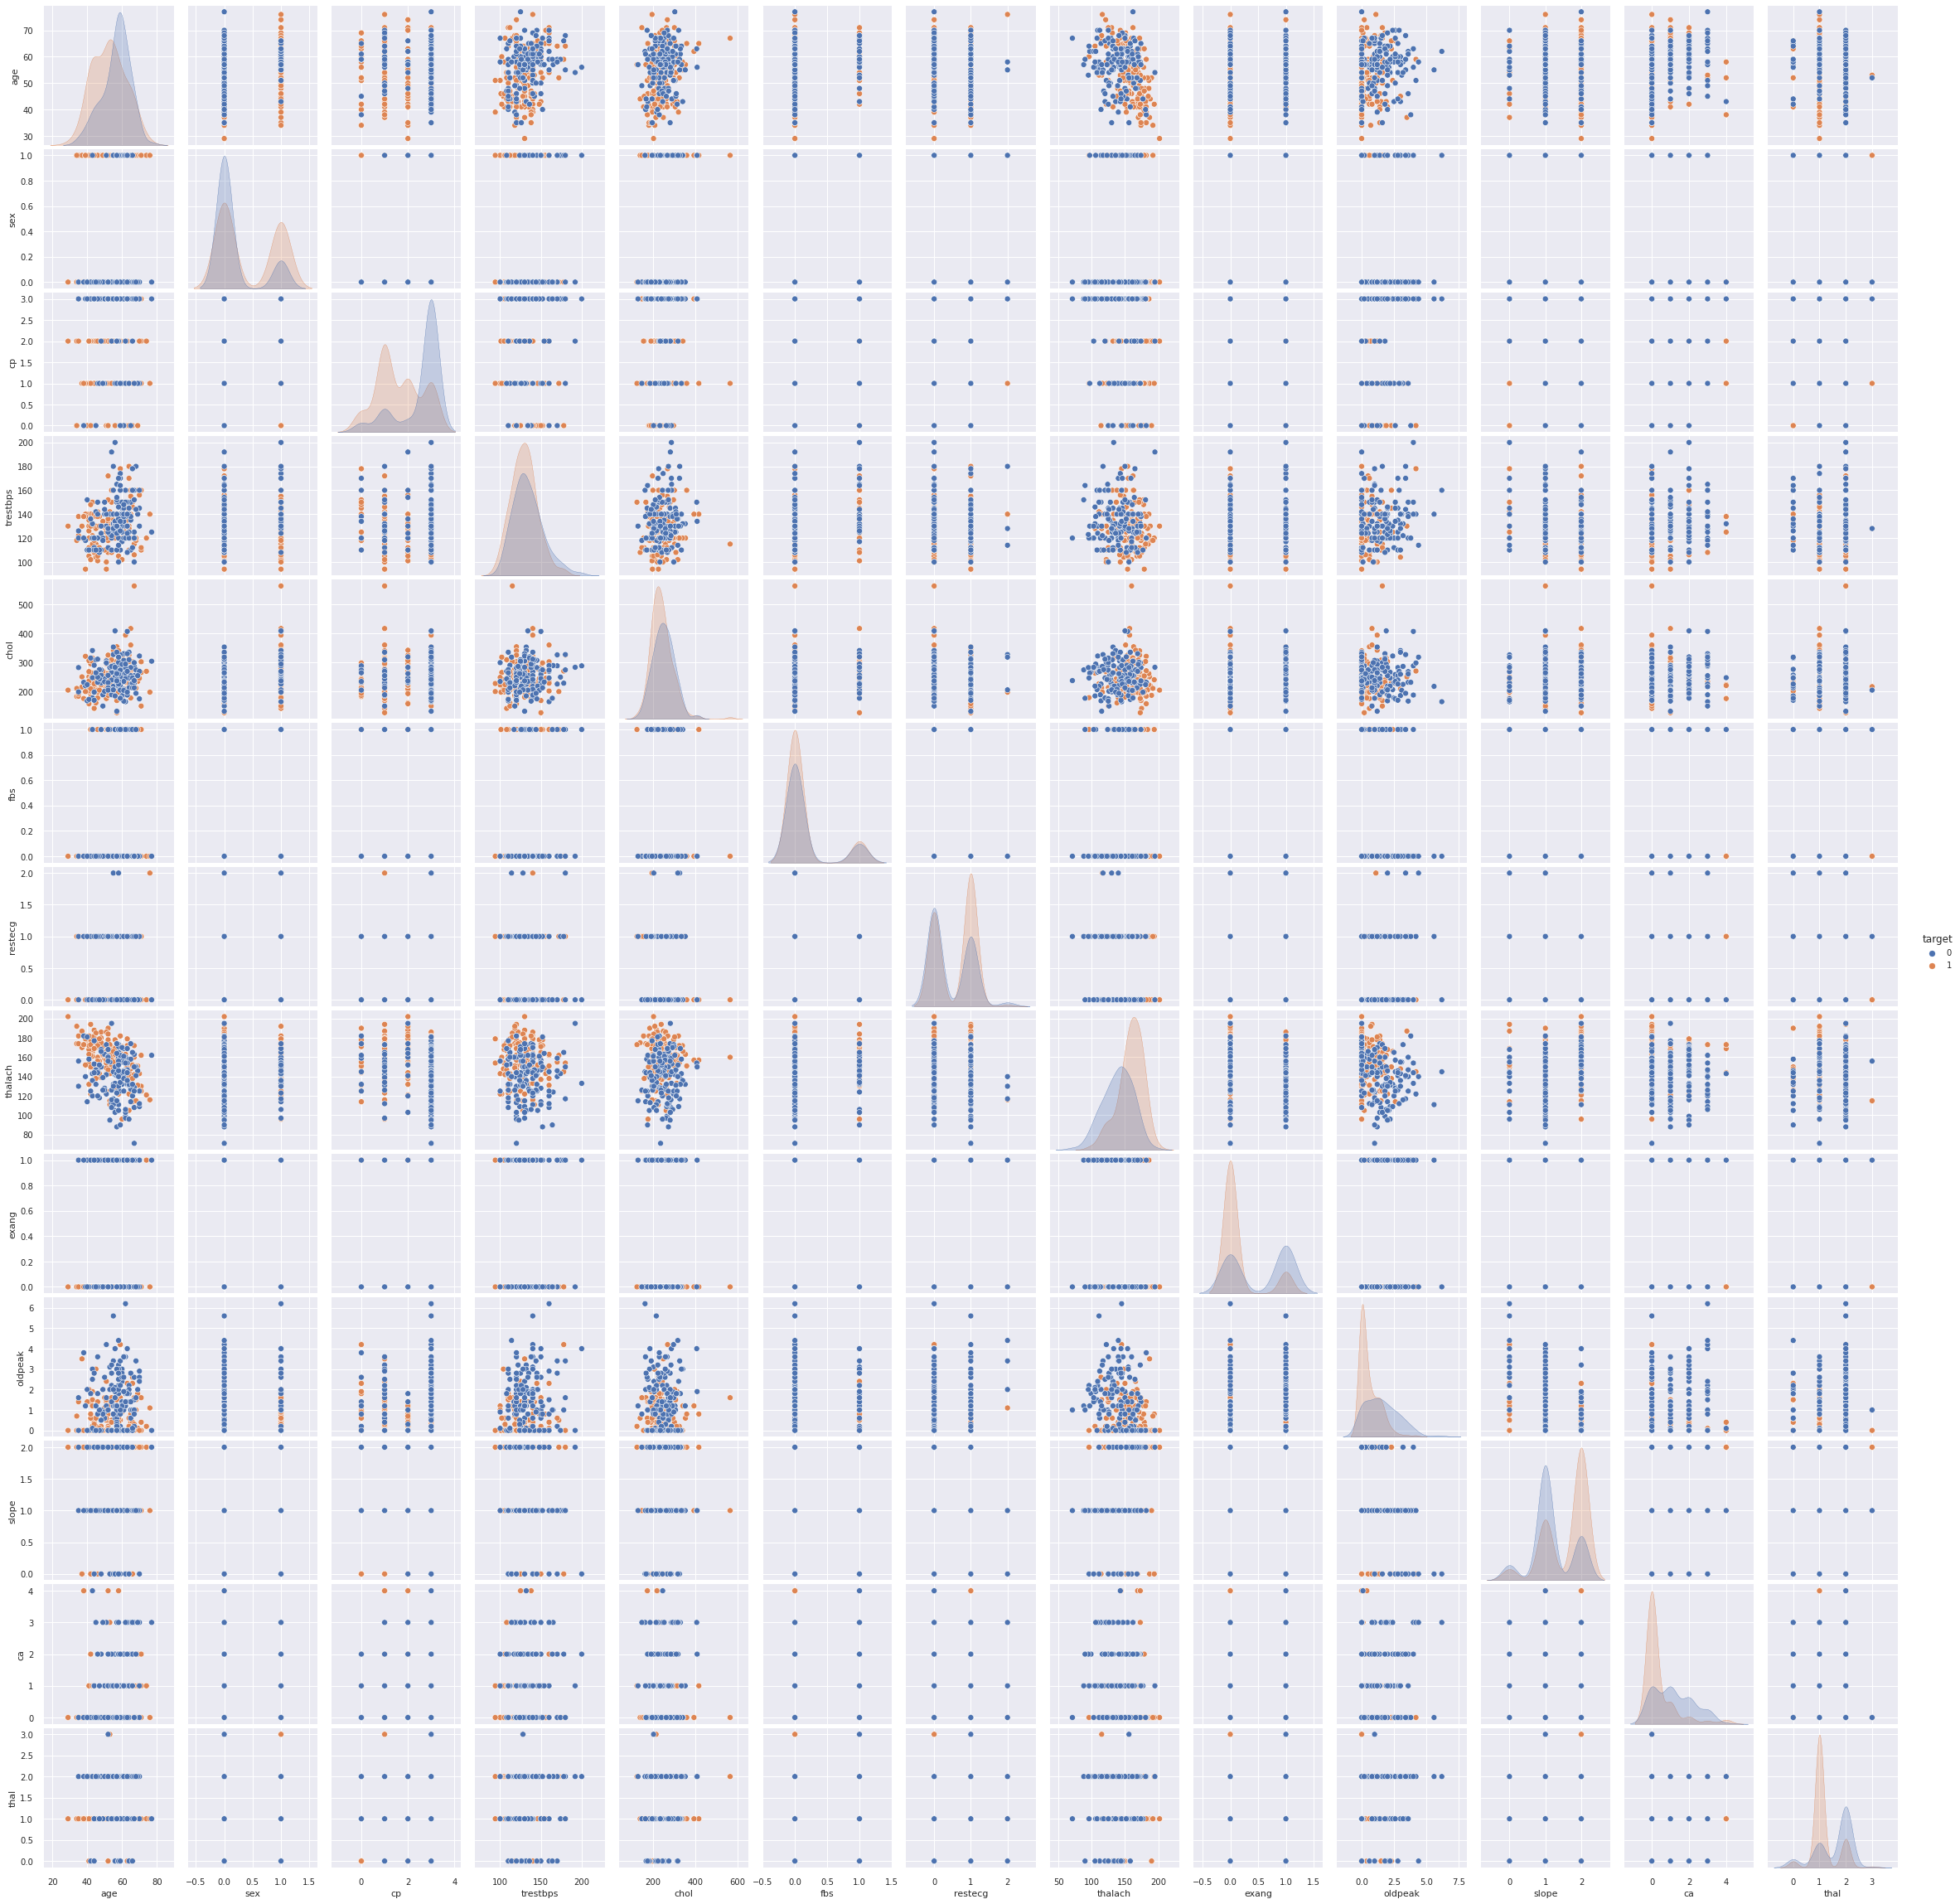

In [13]:
sns.pairplot(visualization_dataset, hue = 'target')

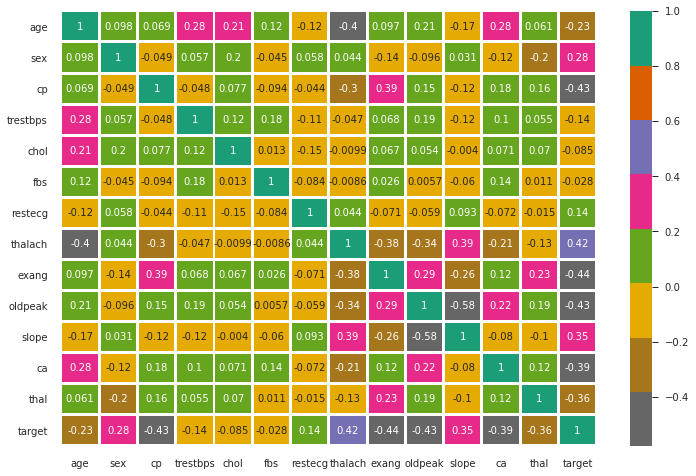

In [14]:
plt.figure(figsize=(12,8)) 
sns.heatmap(visualization_dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

# Data Visualization

<AxesSubplot:xlabel='target', ylabel='age'>

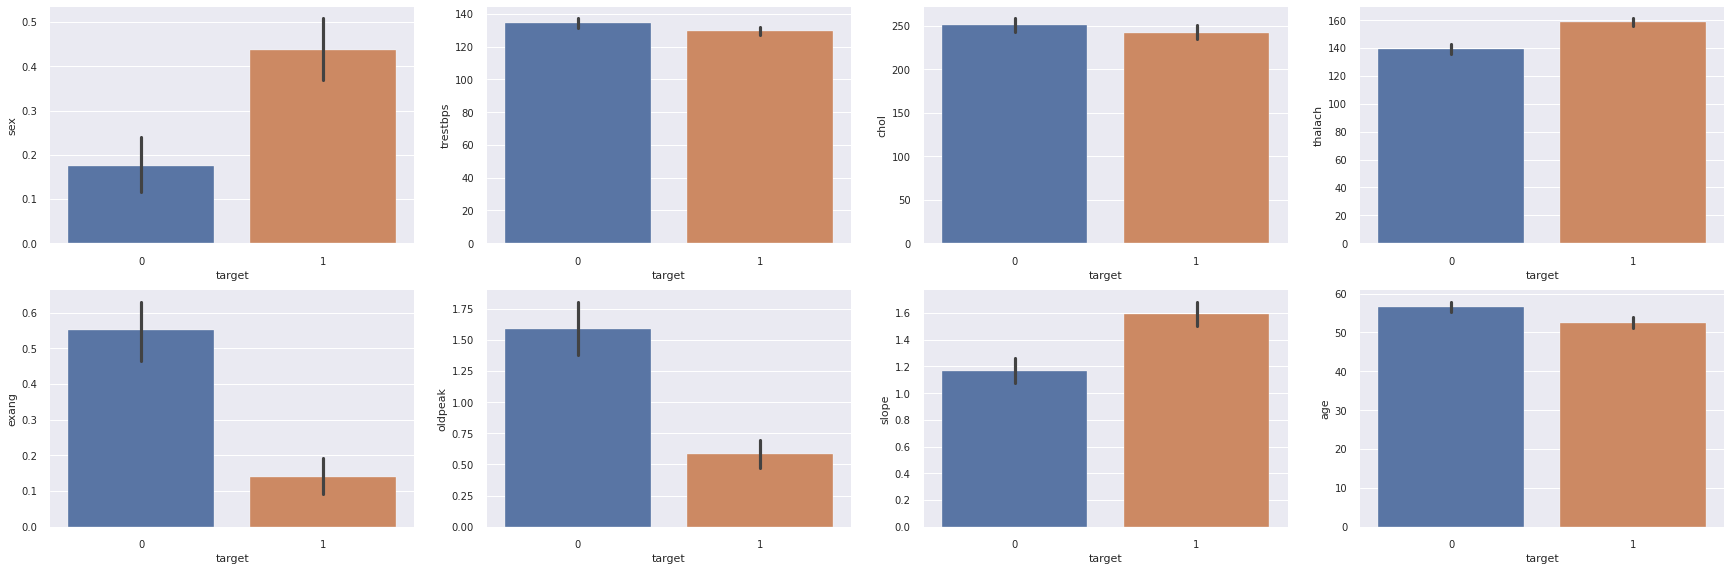

In [15]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'target', y = 'sex', data = visualization_dataset)

plt.subplot(4,4,2)
sns.barplot(x = 'target', y = 'trestbps', data = visualization_dataset)

plt.subplot(4,4,3)
sns.barplot(x = 'target', y = 'chol', data = visualization_dataset)

plt.subplot(4,4,4)
sns.barplot(x = 'target', y = 'thalach', data = visualization_dataset)

plt.subplot(4,4,5)
sns.barplot(x = 'target', y = 'exang', data = visualization_dataset)

plt.subplot(4,4,6)
sns.barplot(x = 'target', y = 'oldpeak', data = visualization_dataset)

plt.subplot(4,4,7)
sns.barplot(x = 'target', y = 'slope', data = visualization_dataset)

plt.subplot(4,4,8)
sns.barplot(x = 'target', y = 'age', data = visualization_dataset)

<AxesSubplot:xlabel='target', ylabel='thal'>

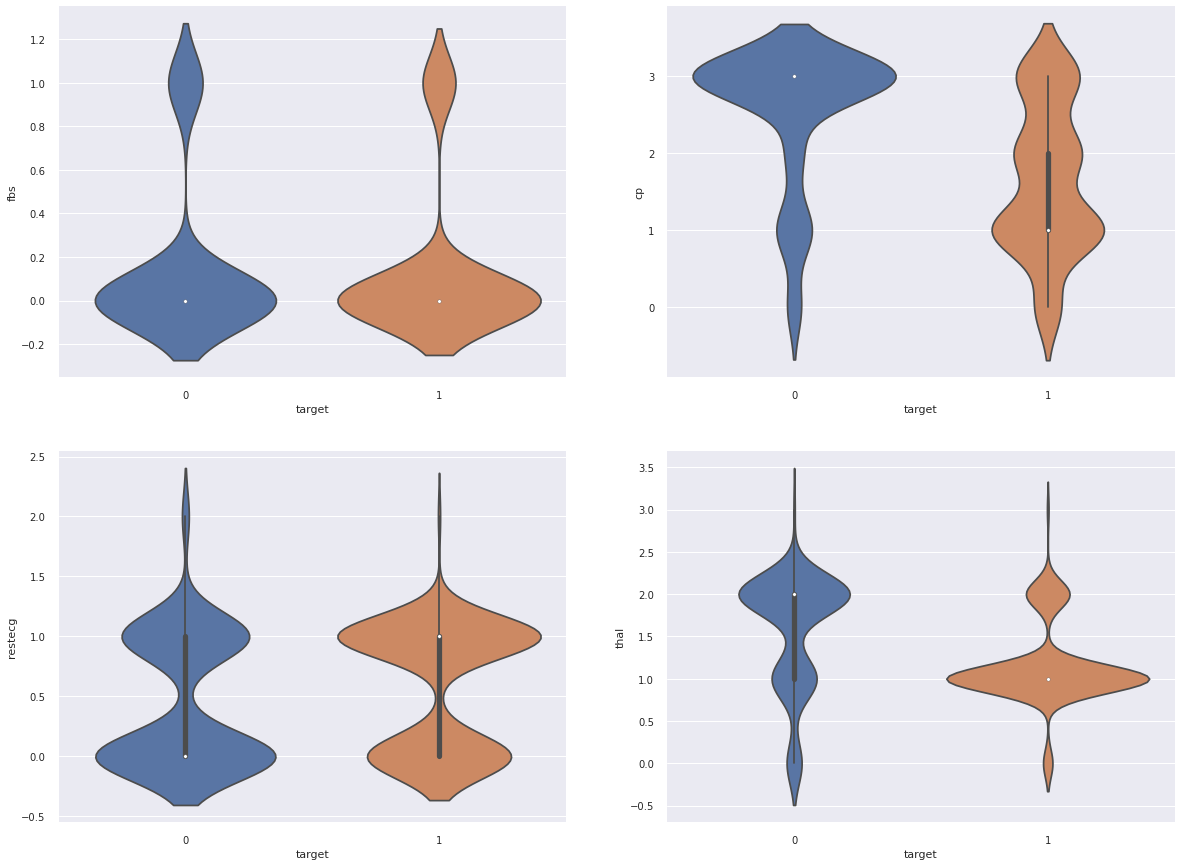

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x = 'target', y = 'fbs', data = visualization_dataset)
plt.subplot(2,2,2)
sns.violinplot(x = 'target', y = 'cp', data = visualization_dataset)
plt.subplot(2,2,3)
sns.violinplot(x = 'target', y = 'restecg', data = visualization_dataset)
plt.subplot(2,2,4)
sns.violinplot(x = 'target', y = 'thal', data = visualization_dataset)

Text(0.5, 1.0, 'Oldpeak Interval')

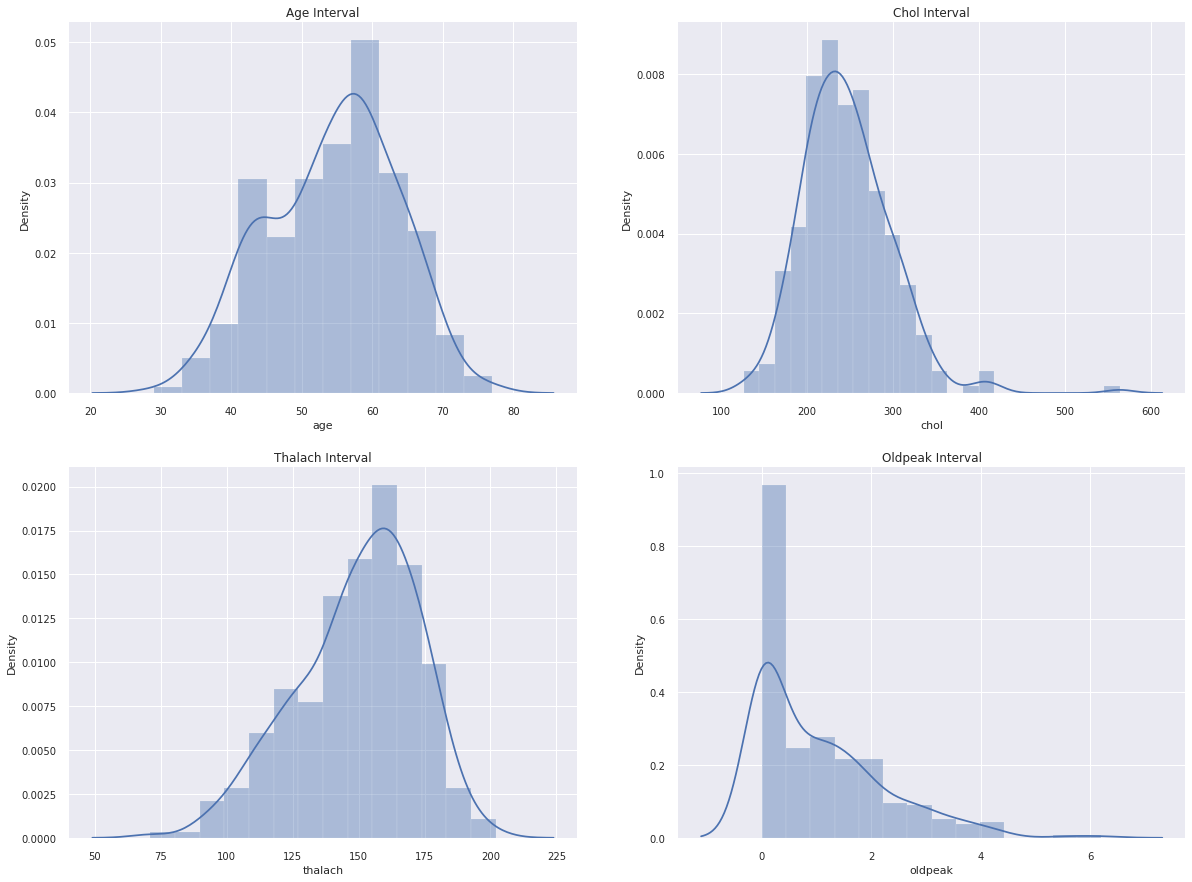

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(visualization_dataset['age']).set_title('Age Interval')
plt.subplot(2,2,2)
sns.distplot(visualization_dataset['chol']).set_title('Chol Interval')
plt.subplot(2,2,3)
sns.distplot(visualization_dataset['thalach']).set_title('Thalach Interval')
plt.subplot(2,2,4)
sns.distplot(visualization_dataset['oldpeak']).set_title('Oldpeak Interval')

# Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [18]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Detecting Unique Values for Encoding

In [19]:
dataset['cp'].unique()

array(['asymptomatic', 'non anginal pain', 'atypical angina',
       'typical angina'], dtype=object)

In [20]:
dataset['fbs'].unique()

array(['high', 'normal'], dtype=object)

In [21]:
dataset['restecg'].unique()

array(['normal', 'S-T abnormanilty', '2'], dtype=object)

In [22]:
dataset['thal'].unique()

array(['fixed deffect', 'reversible deffect', 'deffect-3', 'normal'],
      dtype=object)

In [23]:
dataset['exang'].unique()

array(['no', 'yes'], dtype=object)

# One-Hot Encoding

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, I converted categorical datas to the binary values. This operation increases the accuracy.

In [24]:
onehotencoder = OneHotEncoder()

In [25]:
dataset['cp'] = pd.Categorical(dataset['cp'])
datasetDummies_cp = pd.get_dummies(dataset['cp'], prefix = 'cp_encoded')
datasetDummies_cp

,cp_encoded_asymptomatic,cp_encoded_atypical angina,cp_encoded_non anginal pain,cp_encoded_typical angina
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
298,0,0,0,1
299,1,0,0,0
300,0,0,0,1
301,0,0,0,1


In [26]:
dataset['restecg'] = pd.Categorical(dataset['restecg'])
datasetDummies_restecg = pd.get_dummies(dataset['restecg'], prefix = 'restecg_encoded')
datasetDummies_restecg

,restecg_encoded_2,restecg_encoded_S-T abnormanilty,restecg_encoded_normal
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [27]:
dataset['thal'] = pd.Categorical(dataset['thal'])
datasetDummies_thal = pd.get_dummies(dataset['thal'], prefix = 'thal_encoded')
datasetDummies_thal

,thal_encoded_deffect-3,thal_encoded_fixed deffect,thal_encoded_normal,thal_encoded_reversible deffect
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
298,1,0,0,0
299,1,0,0,0
300,1,0,0,0
301,1,0,0,0


In [28]:
dataset = pd.concat([dataset, datasetDummies_cp], axis=1)
dataset = pd.concat([dataset, datasetDummies_restecg], axis=1)
dataset = pd.concat([dataset, datasetDummies_thal], axis=1)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_encoded_atypical angina,cp_encoded_non anginal pain,cp_encoded_typical angina,restecg_encoded_2,restecg_encoded_S-T abnormanilty,restecg_encoded_normal,thal_encoded_deffect-3,thal_encoded_fixed deffect,thal_encoded_normal,thal_encoded_reversible deffect
0,63,Male,asymptomatic,145,233,high,normal,150,no,2.3,...,0,0,0,0,0,1,0,1,0,0
1,37,Male,non anginal pain,130,250,normal,S-T abnormanilty,187,no,3.5,...,0,1,0,0,1,0,0,0,0,1
2,41,Female,atypical angina,130,204,normal,normal,172,no,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,Male,atypical angina,120,236,normal,S-T abnormanilty,178,no,0.8,...,1,0,0,0,1,0,0,0,0,1
4,57,Female,typical angina,120,354,normal,S-T abnormanilty,163,yes,0.6,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,typical angina,140,241,normal,S-T abnormanilty,123,yes,0.2,...,0,0,1,0,1,0,1,0,0,0
299,45,Male,asymptomatic,110,264,normal,S-T abnormanilty,132,no,1.2,...,0,0,0,0,1,0,1,0,0,0
300,68,Male,typical angina,144,193,high,S-T abnormanilty,141,no,3.4,...,0,0,1,0,1,0,1,0,0,0
301,57,Male,typical angina,130,131,normal,S-T abnormanilty,115,yes,1.2,...,0,0,1,0,1,0,1,0,0,0


# Label Encoding

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [29]:
fbs_mapping = {'normal':0, 'high':1}
dataset['fbs'] = dataset['fbs'].map(fbs_mapping)

In [30]:
sex_mapping = {'Male':0, 'Female':1}
dataset['sex'] = dataset['sex'].map(sex_mapping)

In [31]:
exang_mapping = {'no':0, 'yes':1}
dataset['exang'] = dataset['exang'].map(exang_mapping)

Dropping columns because we dont need them anymore. We converted them binaries.

In [32]:
dataset.drop("cp", axis=1, inplace=True)
dataset.drop("restecg", axis=1, inplace=True)
dataset.drop("thal", axis=1, inplace=True)

In [33]:
dataset

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_encoded_atypical angina,cp_encoded_non anginal pain,cp_encoded_typical angina,restecg_encoded_2,restecg_encoded_S-T abnormanilty,restecg_encoded_normal,thal_encoded_deffect-3,thal_encoded_fixed deffect,thal_encoded_normal,thal_encoded_reversible deffect
0,63,0,145,233,1,150,0,2.3,0,0,...,0,0,0,0,0,1,0,1,0,0
1,37,0,130,250,0,187,0,3.5,0,0,...,0,1,0,0,1,0,0,0,0,1
2,41,1,130,204,0,172,0,1.4,2,0,...,1,0,0,0,0,1,0,0,0,1
3,56,0,120,236,0,178,0,0.8,2,0,...,1,0,0,0,1,0,0,0,0,1
4,57,1,120,354,0,163,1,0.6,2,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,140,241,0,123,1,0.2,1,0,...,0,0,1,0,1,0,1,0,0,0
299,45,0,110,264,0,132,0,1.2,1,0,...,0,0,0,0,1,0,1,0,0,0
300,68,0,144,193,1,141,0,3.4,1,2,...,0,0,1,0,1,0,1,0,0,0
301,57,0,130,131,0,115,1,1.2,1,1,...,0,0,1,0,1,0,1,0,0,0


# Data Preprocessing

In [34]:
list(dataset.columns)

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'target',
 'cp_encoded_asymptomatic',
 'cp_encoded_atypical angina',
 'cp_encoded_non anginal pain',
 'cp_encoded_typical angina',
 'restecg_encoded_2',
 'restecg_encoded_S-T abnormanilty',
 'restecg_encoded_normal',
 'thal_encoded_deffect-3',
 'thal_encoded_fixed deffect',
 'thal_encoded_normal',
 'thal_encoded_reversible deffect']

In [35]:
features = ['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'cp_encoded_asymptomatic',
 'cp_encoded_atypical angina',
 'cp_encoded_non anginal pain',
 'cp_encoded_typical angina',
 'restecg_encoded_2',
 'restecg_encoded_S-T abnormanilty',
 'restecg_encoded_normal',
 'thal_encoded_deffect-3',
 'thal_encoded_fixed deffect',
 'thal_encoded_normal',
 'thal_encoded_reversible deffect']

label = ['target']

X = dataset[features]
y = dataset[label]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 303
Total # of sample in train dataset: 203
Total # of sample in validation dataset: 50
Total # of sample in test dataset: 50


# Scores of Models

GaussianNB
Train score of trained model: 78.32512315270937
Validation score of trained model: 78.0
Test score of trained model: 84.0
 
Confussion Matrix: 
[[18  0]
 [ 8 24]]

Accuracy : 0.84
Precision: 1.0
Recall   : 0.75
F1 score : 0.8571428571428571
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        18
           1       1.00      0.75      0.86        32

    accuracy                           0.84        50
   macro avg       0.85      0.88      0.84        50
weighted avg       0.89      0.84      0.84        50



############################################################################



MultinomialNB
Train score of trained model: 79.80295566502463
Validation score of trained model: 80.0
Test score of trained model: 82.0
 
Confussion Matrix: 
[[20  3]
 [ 6 21]]

Accuracy : 0.82
Precision: 0.875
Recall   : 0.7777777777777778
F1 score : 0.823529411764706
Specificity : 0.8695652173

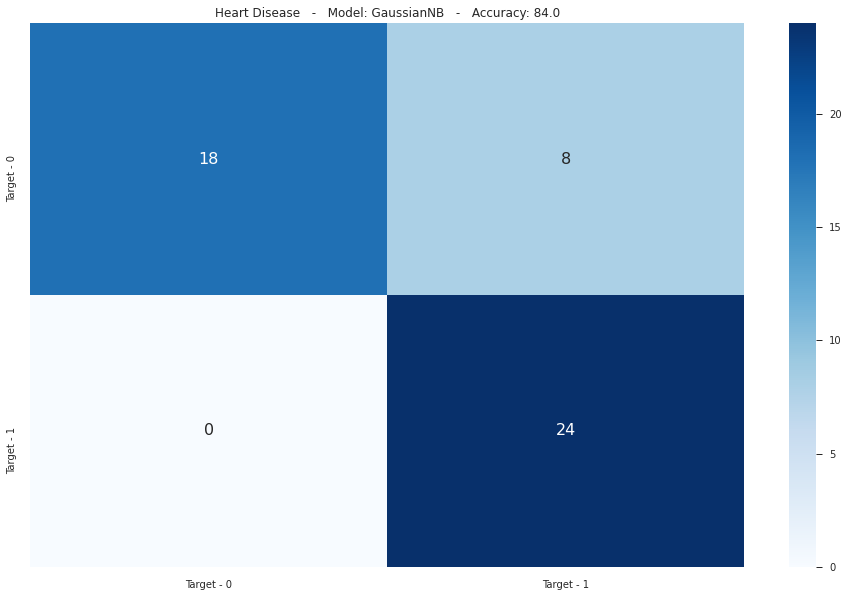

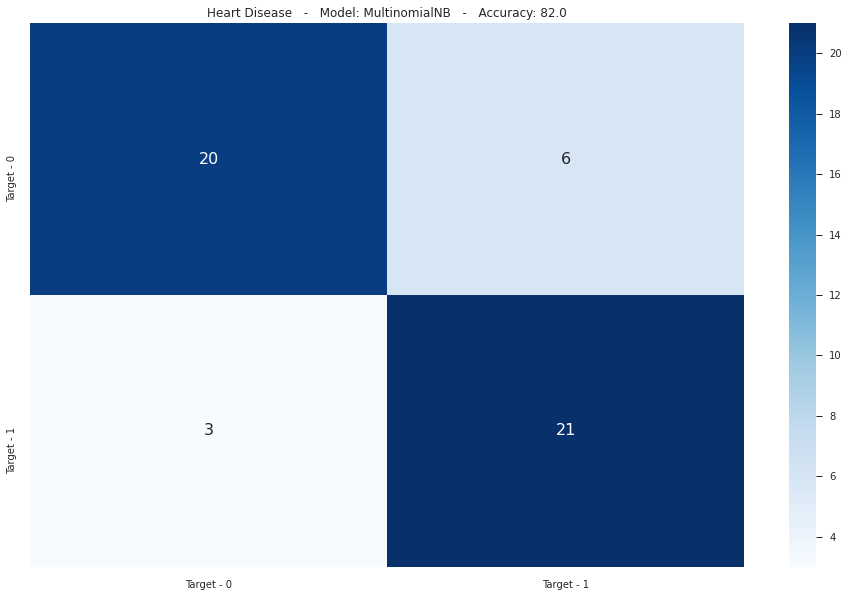

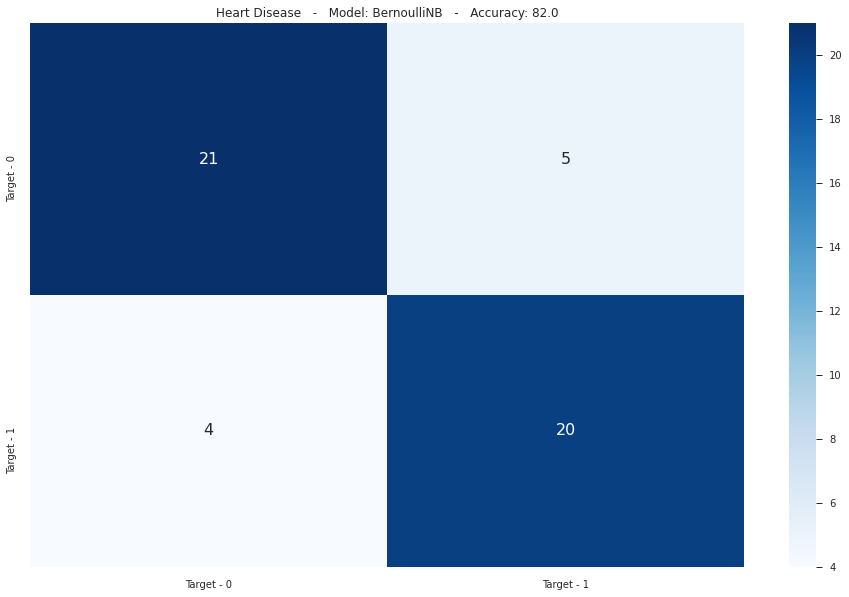

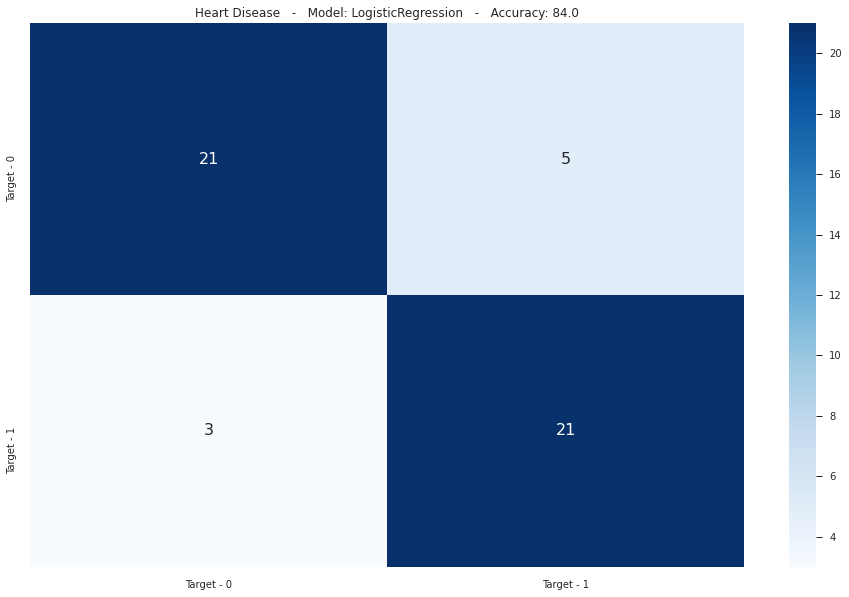

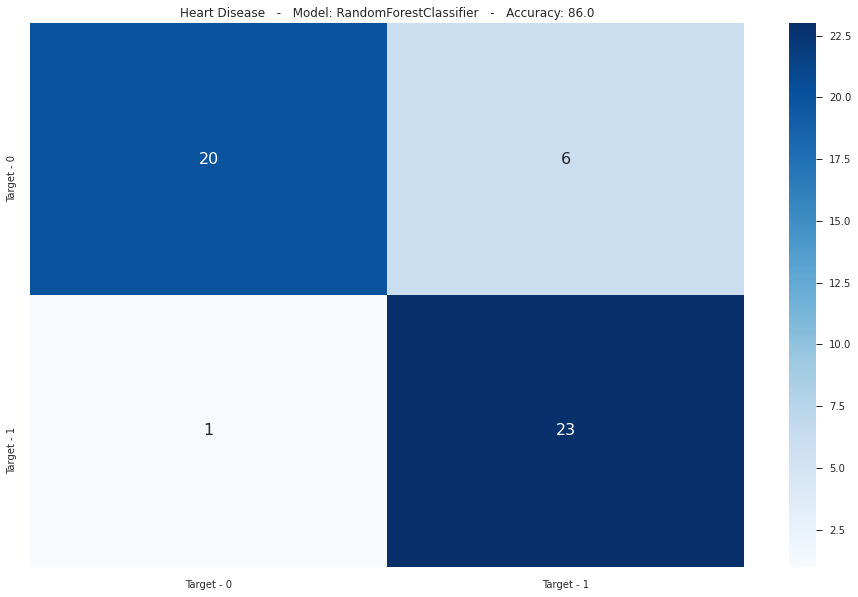

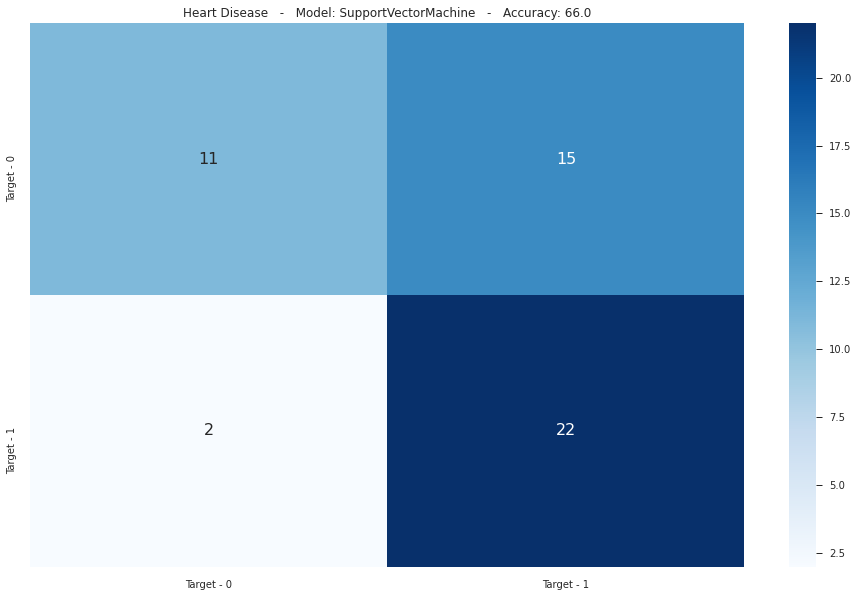

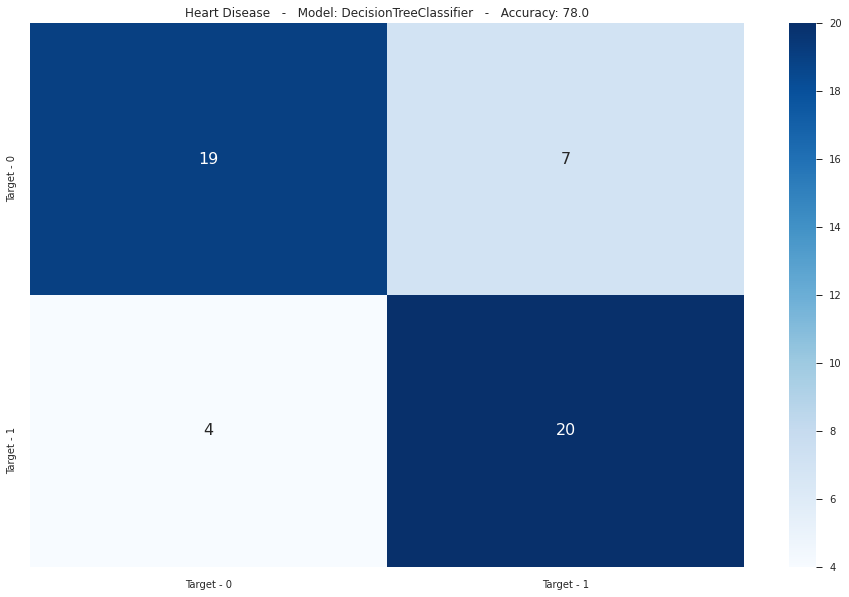

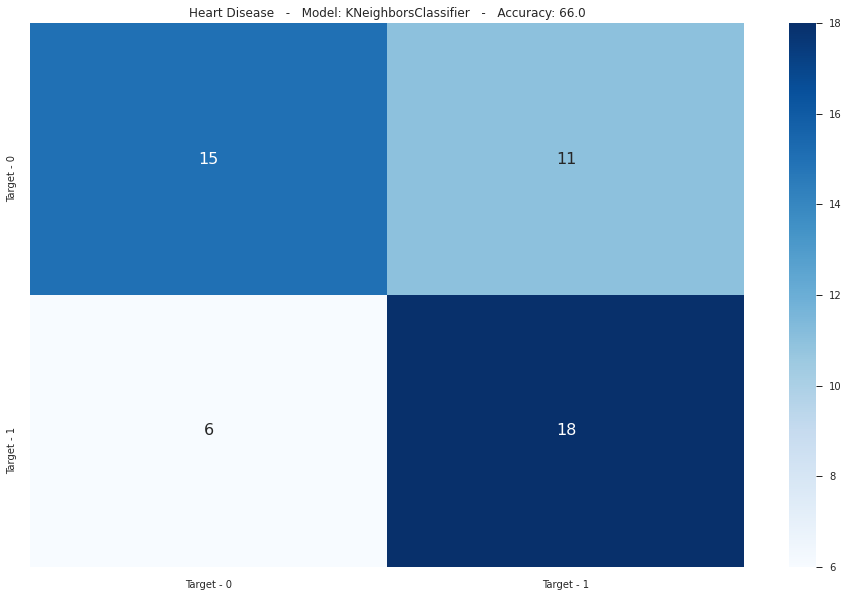

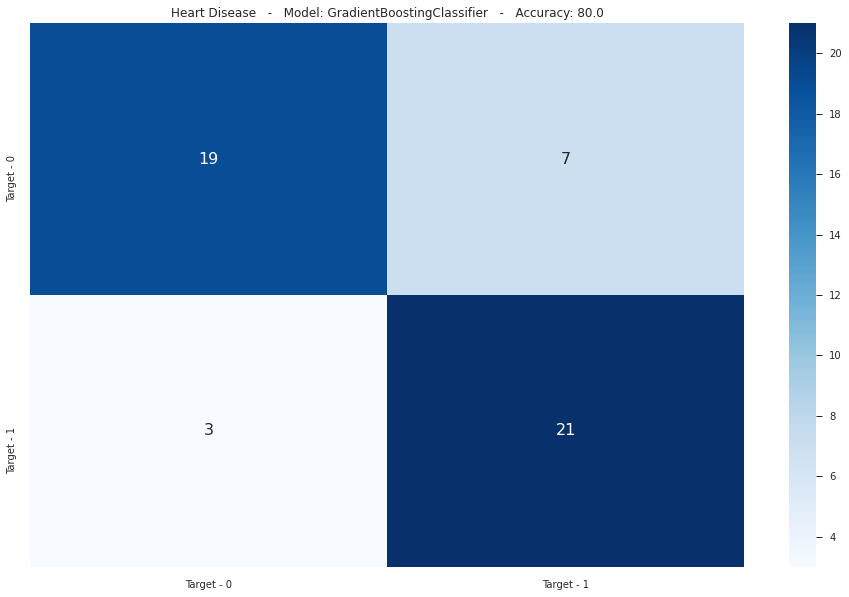

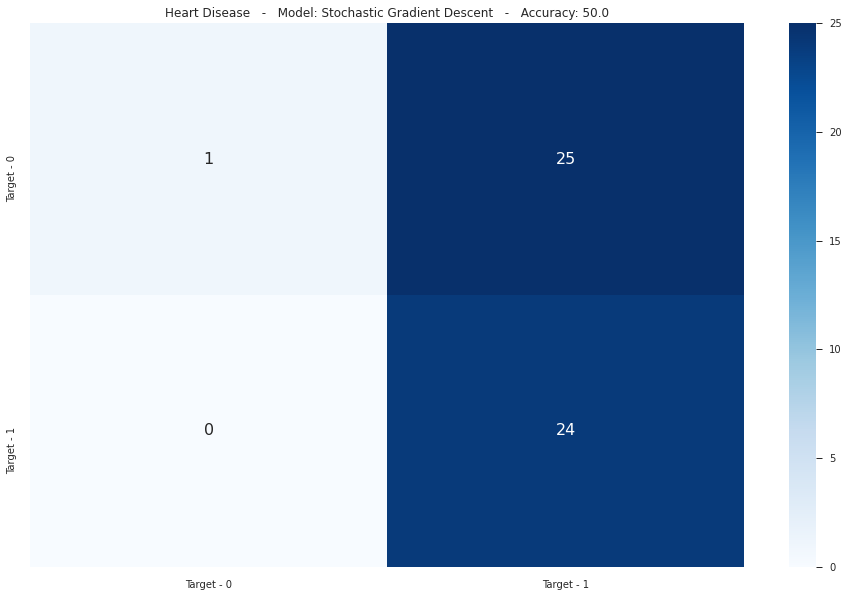

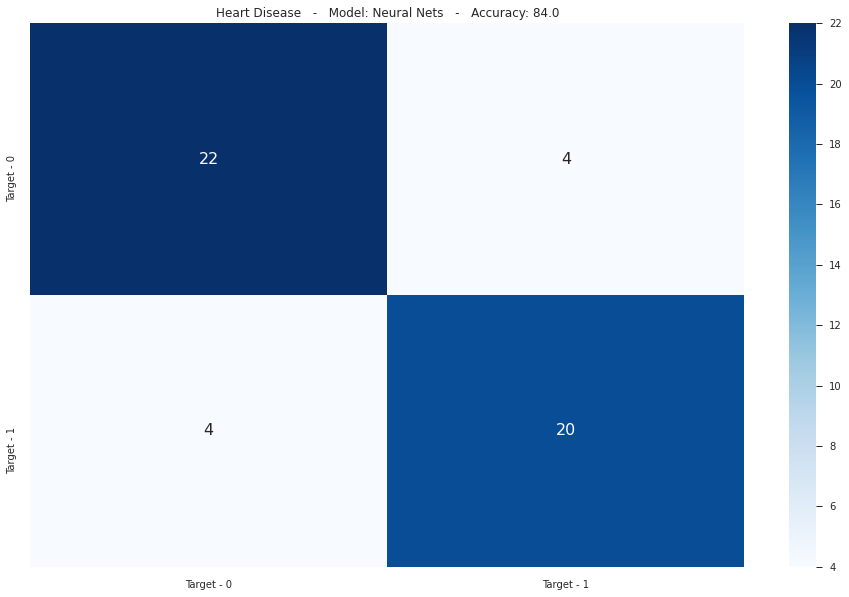

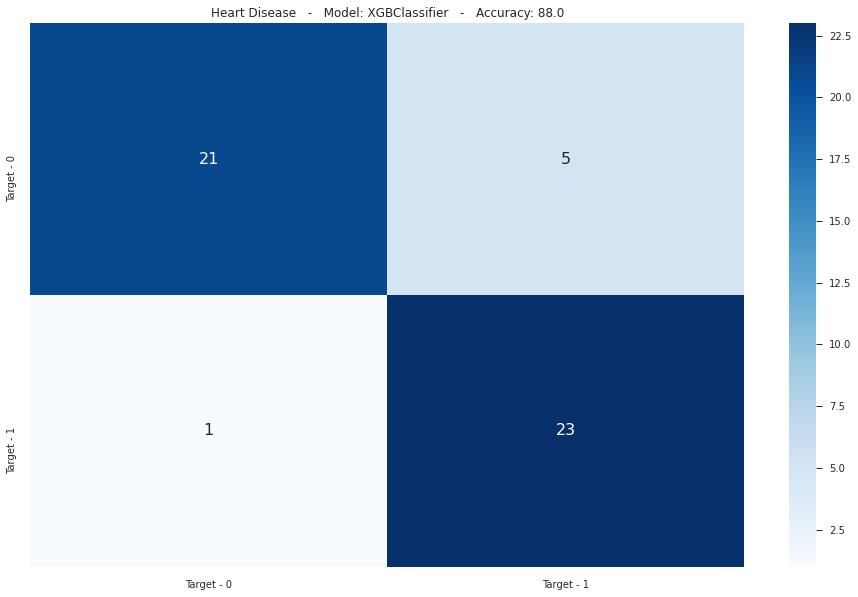

In [37]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  plt.figure(figsize = (16,10))
  plt.title(f'Heart Disease   -   Model: {current}   -   Accuracy: {test_score*100}')
  sns.heatmap(confusion_matr, cmap="Blues", annot=True, annot_kws={"size": 16},
              xticklabels = ['Target - 0', 'Target - 1'],
             yticklabels=['Target - 0', 'Target - 1']);
  #plt.savefig(f'{current}.jpg')
  print("############################################################################")
  print("")
  print("")
  print("")

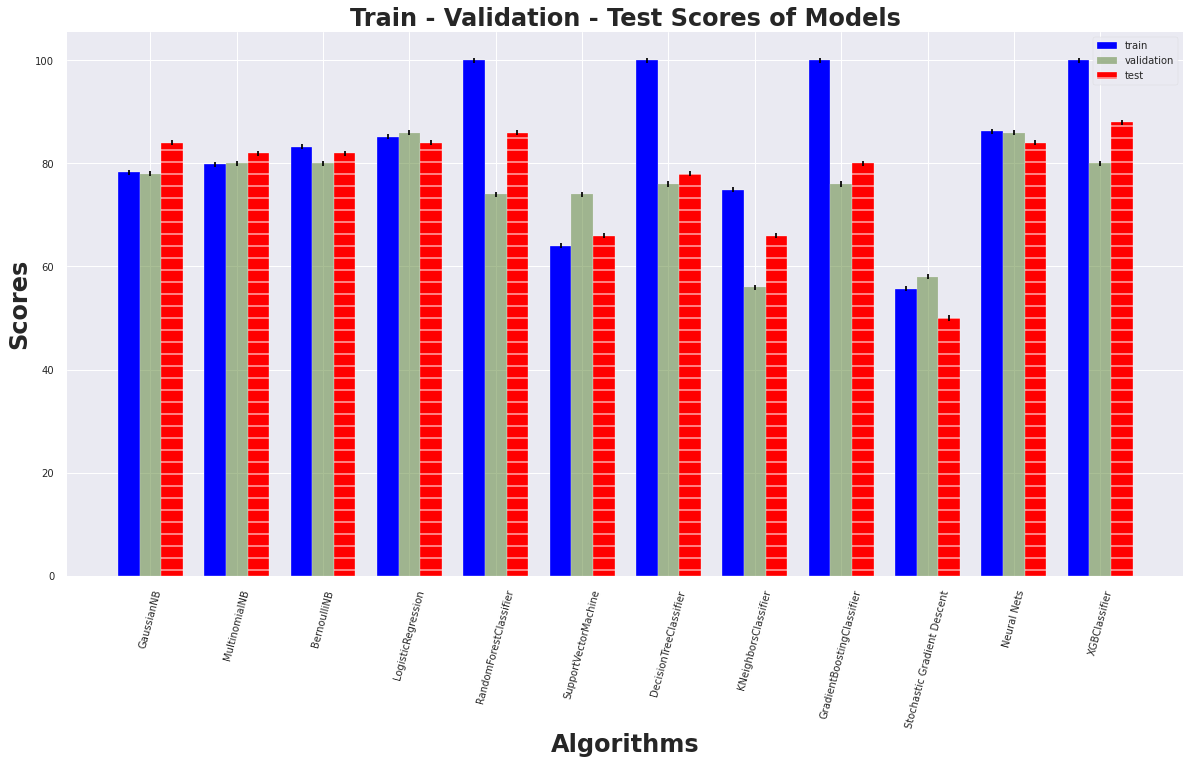

In [38]:
plt.figure(figsize=(20,10))
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [39]:
for i in range(12):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 84.0
Accuracy of MultinomialNB -----> 82.0
Accuracy of BernoulliNB -----> 82.0
Accuracy of LogisticRegression -----> 84.0
Accuracy of RandomForestClassifier -----> 86.0
Accuracy of SupportVectorMachine -----> 66.0
Accuracy of DecisionTreeClassifier -----> 78.0
Accuracy of KNeighborsClassifier -----> 66.0
Accuracy of GradientBoostingClassifier -----> 80.0
Accuracy of Stochastic Gradient Descent -----> 50.0
Accuracy of Neural Nets -----> 84.0
Accuracy of XGBClassifier -----> 88.0


The best algorithm for this dataset is XGBClassifier with 88%.

# Best Features Selection

In [40]:
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'XGBClassifier': XGBClassifier()
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

MultinomialNB
Old Shape: (303, 21) New shape: (303, 15)


BernoulliNB
Old Shape: (303, 21) New shape: (303, 10)


LogisticRegression
Old Shape: (303, 21) New shape: (303, 10)


RandomForestClassifier
Old Shape: (303, 21) New shape: (303, 9)


DecisionTreeClassifier
Old Shape: (303, 21) New shape: (303, 8)


GradientBoostingClassifier
Old Shape: (303, 21) New shape: (303, 7)


Stochastic Gradient Descent
Old Shape: (303, 21) New shape: (303, 11)


[19:37:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
[19:37:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Old Shape: (303, 21) New shape: